In [10]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = "/Users/admin/PycharmProjects/fake_news_detection/fake_news_detection/csvs/politifact_global.csv"

In [3]:
df_csv = pd.read_csv(path)

In [4]:
df_csv.head()

,Unnamed: 0,id,text,title,top_img,publish_date,images,source,target
0,0,politifact14238,"Police in Vernal Heights, Florida, arrested 3-...",Cannibals Arrested in Florida Claim Eating Hum...,http://dailybuzzlive.com/wp-content/uploads/Ca...,1.496706e+09,['http://dailybuzzlive.com/wp-content/uploads/...,politifact,0
1,1,politifact14836,NaN,houstonchronicle-tv.com,NaN,NaN,[],politifact,0
2,2,politifact14207,Keanu Reeves Shook The World With Another POWE...,Keanu Reeves Shook The World With Another POWE...,https://higherperspective-img.rbl.ms/simage/ht...,1.457276e+09,"['https://assets.rbl.ms/15099476/980x.jpg', 'h...",politifact,0
3,3,politifact14831,NaN,Contact Support,NaN,NaN,[],politifact,0
4,4,politifact14469,"\n\nPresident Obama, alongside his family, ser...","First family visits D.C. shelter, highlights h...",https://www.washingtonpost.com/pbox.php?url=ht...,1.448435e+09,['https://www.washingtonpost.com/pbox.php?url=...,politifact,0


1: Unreliable
0: Reliable
Distribution of labels:
1    447
0    381
Name: target, dtype: int64


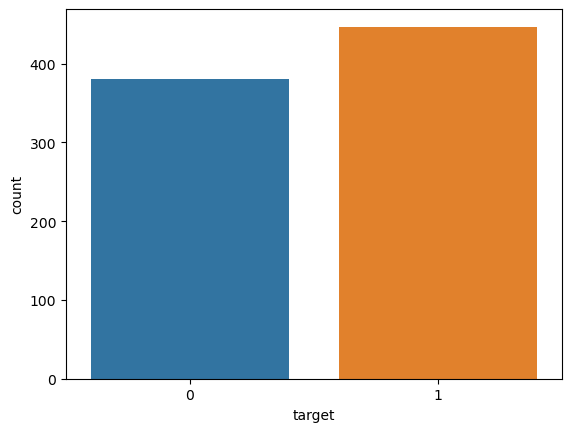

In [11]:
# plt.bar(df_csv[df_csv["target"] == 0], df_csv[df_csv["target"] == 1])

sns.countplot(x="target", data=df_csv);
print(df_csv.target.value_counts());

In [13]:
path1 = "/Users/admin/PycharmProjects/fake_news_detection/fake_news_detection/csvs/politifact_prop.pkl"

In [14]:
df_bal = pickle.load(open(path1, "rb"))

1    156
0    156
Name: target, dtype: int64


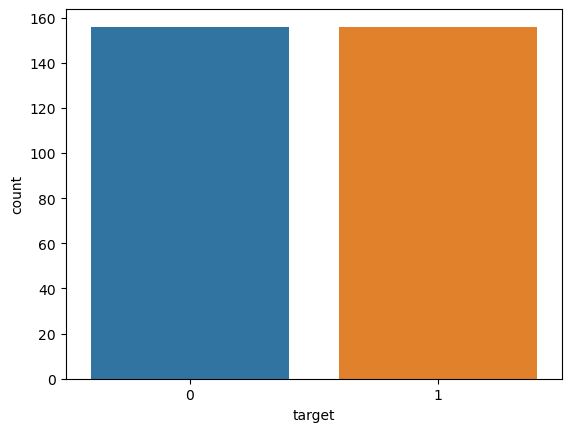

In [15]:
sns.countplot(x="target", data=df_bal);
print(df_bal.target.value_counts());

In [21]:
df_bal.head(3)

,text,title,top_img,publish_date,images,source,target,tweet_mod,comp_text,lem_text
id,,,,,,,,,,
politifact720,Organizing for ’18\n\nThrough Election Day\n\n...,Organizing for Action,https://secure.assets.bostatic.com/apps/quincy...,None,[https://secure.assets.bostatic.com/apps/quinc...,politifact,1,"[{'time': None, 'type': 1, 'user': 1716929114,...",Organizing for 18 Through Election Day Sometim...,organize for 18 through election day sometimes...
politifact10731,"COLUMBUS, Ohio — America's role as a world lea...",Call 'Islamic terrorism' what it is: a threat ...,http://triblive.com/csp/mediapool/sites/dt.com...,1429079762.0,[http://triblive.com/csp/mediapool/sites/TribL...,politifact,1,"[{'time': None, 'type': 1, 'user': 1716929114,...",COLUMBUS Ohio America's role as a world leader...,columbus ohio americas role a a world leader a...
politifact11115,"In the course of the email review, State Depar...",Inquiry Sought in Hillary Clinton’s Use of Email,https://static01.nyt.com/images/2015/07/24/us/...,1437721200.0,[https://static01.nyt.com/images/2015/07/24/us...,politifact,1,"[{'time': None, 'type': 1, 'user': 1716929114,...",In the course of the email review State Depart...,in the course of the email review state depart...


In [58]:
tweet = list(df_bal["tweet_mod"])[0]

In [61]:
import subprocess 
subprocess.run("pbcopy", text=True, input=str(tweet))

CompletedProcess(args='pbcopy', returncode=0)

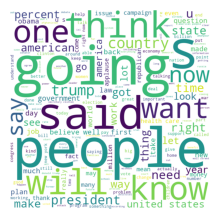

In [55]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_bal["comp_text"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (2, 2), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

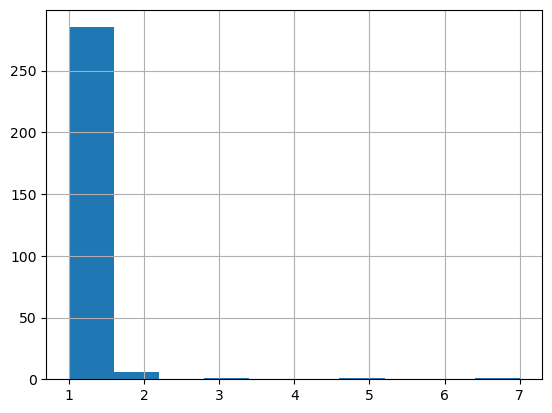

In [44]:
df_bal['comp_text'].value_counts().hist()


In [54]:
df_bal['lem_text'].value_counts().plot(kind='bar')

ValueError: Image size of 540x648321 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


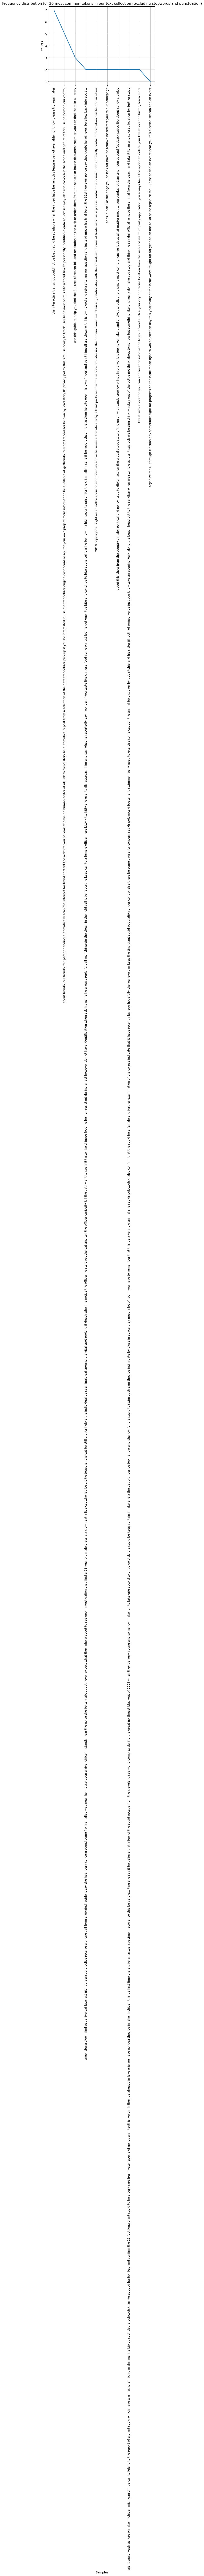

In [53]:
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [w for w in df_bal["lem_text"] if not w in remove_these]
# fdist_filtered = FreqDist(word.lower() for word in word_tokenize(df_bal["lem_text"]))
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(10,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')
# plt.text(0.5, 0.5, 'Some text', transform=ax.transAxes)

